In [1]:
import datetime
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 10
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("archive/ADANIPORTS.csv")
df.head()



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


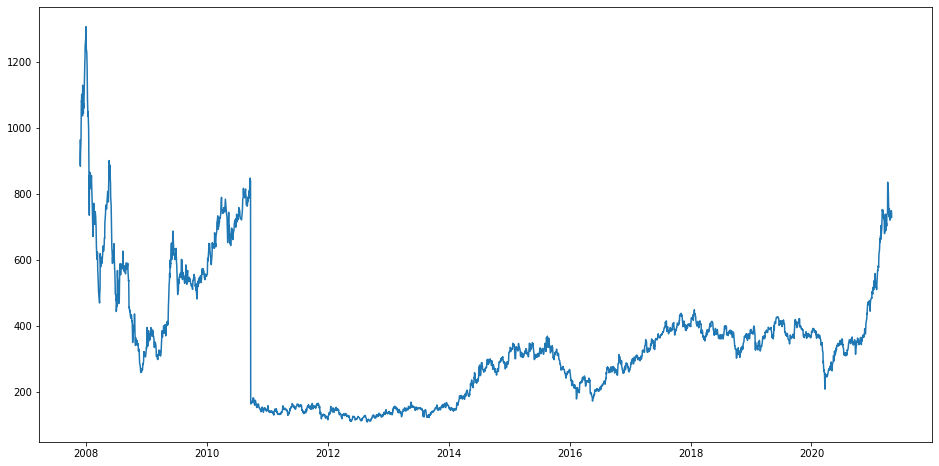

In [3]:
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index = df['Date']
plt.figure(figsize=(16, 8))
plt.plot(df["Close"], label='Close Price history')

In [4]:
data=df.sort_index(ascending=True,axis=0)
# new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

new_dataset = data[['Open','Close']].astype(float)

<AxesSubplot:xlabel='Date'>

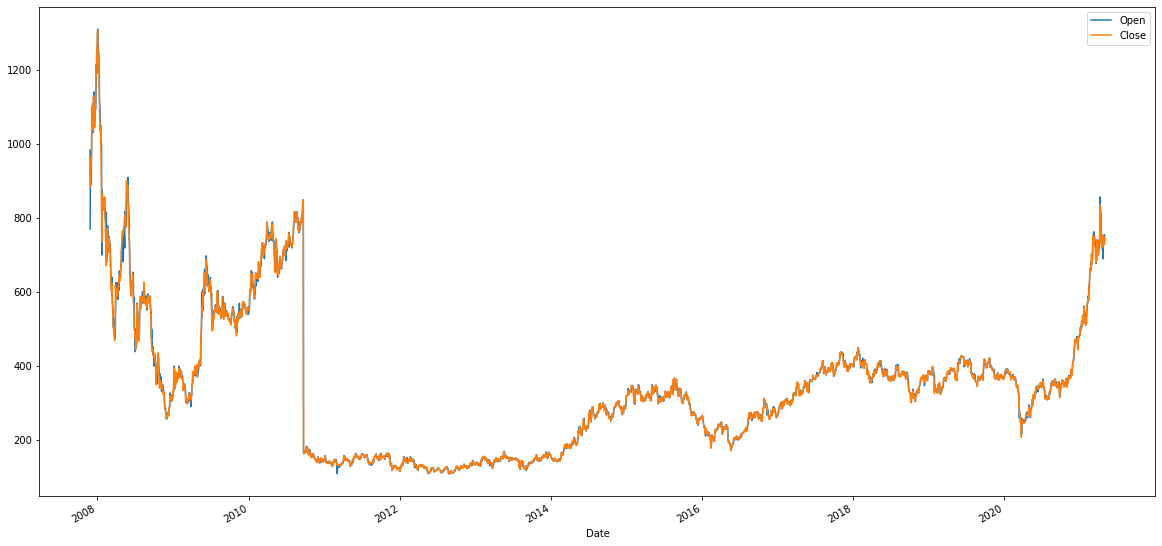

In [5]:
new_dataset.plot.line()

# for i in range(0,len(data)):
#     new_dataset["Date"][i]=data['Date'][i].timestamp()
#     new_dataset["Close"][i]=data["Close"][i]

In [6]:
partition_point = int(len(new_dataset) * 0.9)

scalerX = MinMaxScaler(feature_range=(0,2))
scaled_data = scalerX.fit_transform(new_dataset)

train_data = scaled_data[:partition_point]
test_data = scaled_data[partition_point:]
# train_data[0:60]
print("shape of train_data", train_data.shape)
print("shape of test_data", test_data.shape)

shape of train_data (2989, 2)
shape of test_data (333, 2)


In [7]:
# new_dataset.index=new_dataset.Date
# new_dataset.drop("Date",axis=1,inplace=True)

x_train_data, y_train_data = [], []
for i in range(60,len(train_data)):
    x_train_data.append(train_data[i-60:i])
    y_train_data.append(train_data[i,1])
    
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
# x_train_data = np.reshape(x_train_data,(x_train_data.shape[0], x_train_data.shape[1], 1))
print("shape of x_train_data", x_train_data.shape)
print("shape of y_train_data", y_train_data.shape)


shape of x_train_data (2929, 60, 2)
shape of y_train_data (2929,)


In [8]:
new_dataset


,Open,Close
Date,,
2007-11-27,770.00,962.90
2007-11-28,984.00,893.90
2007-11-29,909.00,884.20
2007-11-30,890.00,921.55
2007-12-03,939.75,969.30
...,...,...
2021-04-26,733.00,730.75
2021-04-27,735.00,749.15
2021-04-28,755.00,746.25


In [9]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=64, return_sequences=True,input_shape=(x_train_data.shape[1], 2)))
lstm_model.add(LSTM(units=32))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            17152     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________


In [10]:
lstm_model.fit(x_train_data, y_train_data,epochs=10,batch_size=1,verbose=2)

Epoch 1/10
2929/2929 - 36s - loss: 0.0037 - 36s/epoch - 12ms/step
Epoch 2/10
2929/2929 - 32s - loss: 0.0020 - 32s/epoch - 11ms/step
Epoch 3/10
2929/2929 - 35s - loss: 0.0013 - 35s/epoch - 12ms/step
Epoch 4/10
2929/2929 - 33s - loss: 0.0012 - 33s/epoch - 11ms/step
Epoch 5/10
2929/2929 - 34s - loss: 0.0012 - 34s/epoch - 11ms/step
Epoch 6/10
2929/2929 - 34s - loss: 0.0010 - 34s/epoch - 12ms/step
Epoch 7/10
2929/2929 - 34s - loss: 0.0011 - 34s/epoch - 11ms/step
Epoch 8/10
2929/2929 - 33s - loss: 9.9351e-04 - 33s/epoch - 11ms/step
Epoch 9/10
2929/2929 - 34s - loss: 0.0010 - 34s/epoch - 12ms/step
Epoch 10/10
2929/2929 - 33s - loss: 0.0010 - 33s/epoch - 11ms/step


In [11]:
X_test = []
valid_data = pd.DataFrame(index=range(0,len(test_data) - 60),columns=['Date','Close'])
for i in range(60, test_data.shape[0]):
    X_test.append(test_data[i-60:i])
    valid_data["Date"][i-60] = data['Date'][partition_point + i]
    valid_data["Close"][i-60]= new_dataset["Close"][partition_point + i]

X_test = np.array(X_test)
# X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price = lstm_model.predict(X_test)
predicted_closing_price = np.repeat(predicted_closing_price, 2, axis=-1)
predicted_closing_price = scalerX.inverse_transform(predicted_closing_price)[:, 1]

In [12]:
print("shape of test_data", test_data.shape)
print("shape of predicted_closing_price", predicted_closing_price.shape)
predicted_closing_price

shape of test_data (333, 2)
shape of predicted_closing_price (273,)


array([224.40488, 239.44624, 240.35448, 244.23872, 243.0527 , 244.3822 ,
       238.26003, 238.37843, 242.3279 , 243.10959, 244.89224, 252.24762,
       258.766  , 258.28058, 260.7432 , 262.66916, 257.29288, 260.8274 ,
       267.06564, 261.94067, 262.71436, 263.7226 , 274.99335, 280.57736,
       259.01678, 257.31522, 260.31177, 270.46384, 274.67722, 278.38242,
       280.45062, 295.8942 , 295.03485, 297.3365 , 284.68008, 304.83603,
       310.52875, 305.13562, 299.60593, 303.71222, 312.1825 , 318.86533,
       312.3264 , 316.73273, 325.86987, 327.65372, 326.9361 , 328.38934,
       330.6464 , 333.02982, 333.4501 , 327.3111 , 329.6608 , 327.5704 ,
       329.48505, 328.7557 , 330.41864, 335.13205, 336.4193 , 341.3812 ,
       338.72055, 331.36356, 331.26346, 329.60144, 331.0944 , 331.35898,
       333.9132 , 345.87994, 347.04752, 334.99252, 329.52258, 330.51764,
       323.29834, 320.67358, 310.7056 , 305.0046 , 301.48343, 302.00424,
       305.8937 , 304.5621 , 301.71878, 302.78738, 

<AxesSubplot:xlabel='Date'>

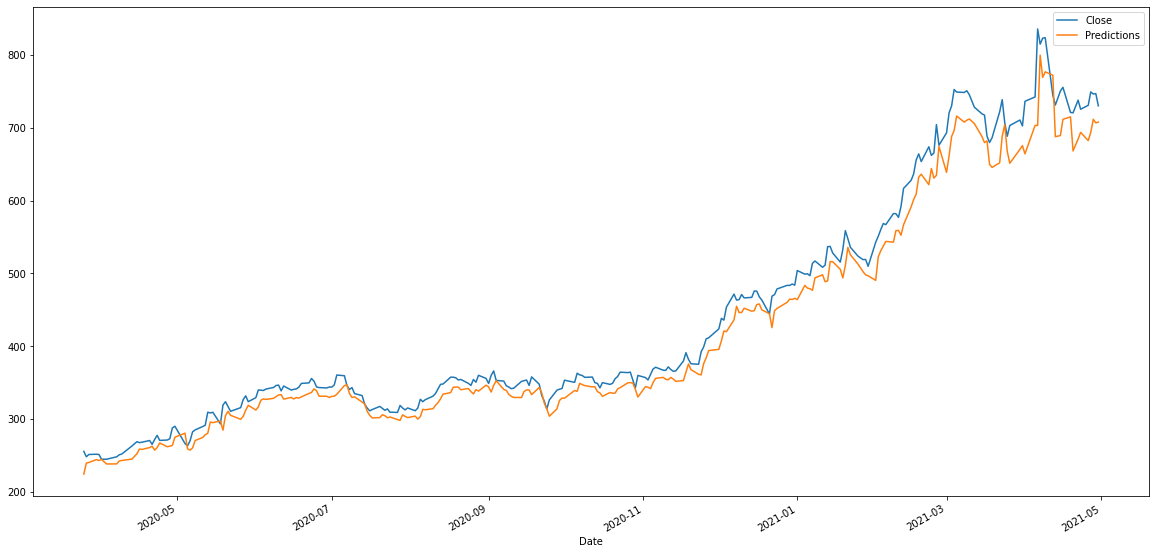

In [13]:
valid_data.index=valid_data.Date
valid_data.drop("Date",axis=1,inplace=True)
valid_data['Predictions'] = predicted_closing_price
valid_data.plot.line()

In [14]:
lstm_model.save("saved_model.h5")
